-------------------------------------------------------------------
# Collaborative Filtering

## User based filtering
measure the similarity between target users and other users

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
# Similarity
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
book_df = pd.read_csv('./Books.csv', low_memory=False)

ratings_df = pd.read_csv('./Ratings.csv')
user_df = pd.read_csv('./Users.csv')

### Ratings data overview

All 1149780 ratings that the dataset contains and its columns

In [3]:
ratings_df.info()
ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings data cleaning

All 433671 after removing all Book-ratings that has the value 0.

In [4]:
ratings_df_clean = ratings_df[(ratings_df != 0)["Book-Rating"]]

In [5]:
ratings_df_clean.info()
ratings_df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


### User data overview

All 278858 users, data and data columns. Some users are missing their age. This has no effect on this filtering.

In [6]:
user_df.info()
user_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Book data overview

271360 books in the book CSV. Some of the rows image url of large images are missing. Some Authors and publishers are also missing.

In [7]:
book_df.info()
book_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Data processing with cleaned ratings data 

Here the ratings and user files are joined based on User-ID that's present in both files. 

In [9]:
user_rating_df_clean = ratings_df_clean.merge(user_df, left_on = 'User-ID', right_on = 'User-ID')
user_rating_df_clean.info()
user_rating_df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 0 to 433670
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      433671 non-null  int64  
 1   ISBN         433671 non-null  object 
 2   Book-Rating  433671 non-null  int64  
 3   Location     433671 non-null  object 
 4   Age          305277 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 19.9+ MB


,User-ID,ISBN,Book-Rating,Location,Age
0,276726,0155061224,5,"seattle, washington, usa",NaN
1,276729,052165615X,3,"rijeka, n/a, croatia",16.0
2,276729,0521795028,6,"rijeka, n/a, croatia",16.0
3,276736,3257224281,8,"salzburg, salzburg, austria",NaN
4,276737,0600570967,6,"sydney, new south wales, australia",14.0


In [10]:
print('The unique ratings are', sorted(user_rating_df_clean['Book-Rating'].unique()))

The unique ratings are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Data exploration

### Overview of sum of ratings for all books

aggregate average of all books ratings

In [52]:
agg_ratings = user_rating_df_clean.groupby('ISBN').agg(mean_rating = ('Book-Rating', 'mean'),
                                                number_of_ratings = ('Book-Rating', 'count')).reset_index()

#### Amount of books with a rating with or with more than 5 ratings

In [12]:
agg_ratings[agg_ratings['number_of_ratings']>=5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14535 entries, 32 to 185360
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               14535 non-null  object 
 1   mean_rating        14535 non-null  float64
 2   number_of_ratings  14535 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 454.2+ KB


#### Amount of books with a rating with or with more than 10 ratings

In [13]:
agg_ratings[agg_ratings['number_of_ratings']>=10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5645 entries, 353 to 184829
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               5645 non-null   object 
 1   mean_rating        5645 non-null   float64
 2   number_of_ratings  5645 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 176.4+ KB


#### Amount of books with a rating with or with more than 50 ratings

In [14]:
agg_ratings[agg_ratings['number_of_ratings']>=50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 1926 to 148538
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               537 non-null    object 
 1   mean_rating        537 non-null    float64
 2   number_of_ratings  537 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 16.8+ KB


#### Amount of books with a rating with or with more than 100 ratings

In [58]:
agg_ratings[agg_ratings['number_of_ratings']>=100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 4029 to 141160
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               140 non-null    object 
 1   mean_rating        140 non-null    float64
 2   number_of_ratings  140 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


#### agg_ratings_GT50 used for the collab filtering (gives a balance between load-time and similarity between users

In [82]:
agg_ratings_GT50 = agg_ratings[agg_ratings['number_of_ratings']>=50]
agg_ratings_GT50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 1926 to 148538
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               537 non-null    object 
 1   mean_rating        537 non-null    float64
 2   number_of_ratings  537 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 16.8+ KB


#### Most rated books (cleaned data)

In [63]:
agg_ratings_GT50.sort_values(by='number_of_ratings', ascending=False).head()

,ISBN,mean_rating,number_of_ratings
26378,0316666343,8.185290,707
132534,0971880107,4.390706,581
44961,0385504209,8.435318,487
22405,0312195516,8.182768,383
90207,0679781587,8.408408,333


#### Most rated books (Raw data) 

In [64]:
agg_ratings_raw = user_rating_df.groupby('ISBN').agg(mean_rating = ('Book-Rating', 'mean'),
                                                number_of_ratings = ('Book-Rating', 'count')).reset_index()



In [70]:
agg_ratings_GT50_raw = agg_ratings_raw[agg_ratings_raw['number_of_ratings']>=50]
agg_ratings_GT50_raw.sort_values(by='number_of_ratings', ascending=False).info()
agg_ratings_GT50_raw.sort_values(by='number_of_ratings', ascending=False).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 247408 to 12768
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               2185 non-null   object 
 1   mean_rating        2185 non-null   float64
 2   number_of_ratings  2185 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 68.3+ KB


,ISBN,mean_rating,number_of_ratings
247408,0971880107,1.019584,2502
47371,0316666343,4.468726,1295
83359,0385504209,4.652322,883
9637,0060928336,3.448087,732
41007,0312195516,4.334716,723


#### Plot overview of all ratings for books with cleaned data

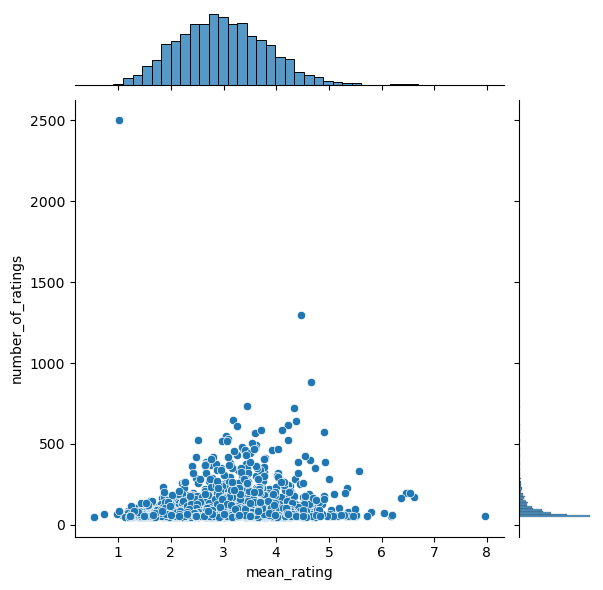

In [71]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT50_raw)

#### Plot overview of all ratings for books with cleaned data

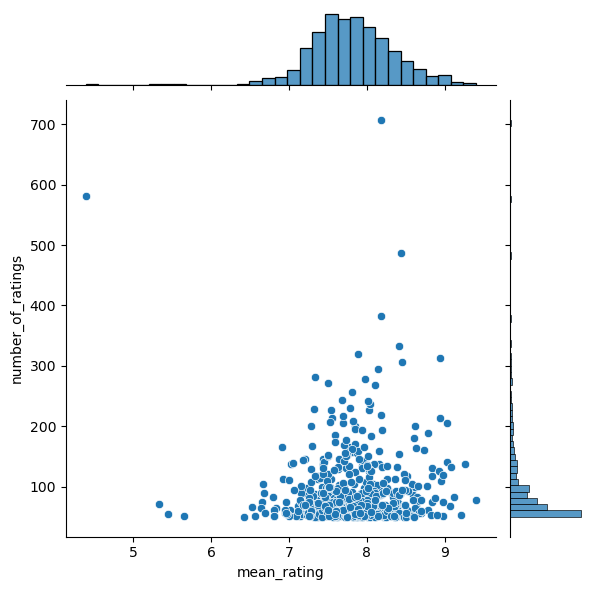

In [72]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT50)

### After cleaning and explorating the data it's been determined to move forward with below data 

In [74]:
agg_ratings_GT50.info()
agg_ratings_GT50.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 1926 to 148538
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               537 non-null    object 
 1   mean_rating        537 non-null    float64
 2   number_of_ratings  537 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 32.9+ KB


,ISBN,mean_rating,number_of_ratings
1926,002542730X,7.805195,77
2884,0060096195,8.132075,53
3144,006016848X,6.947368,57
3225,0060173289,7.610169,59
3261,0060175400,8.384615,78


### cleaning data so we only have the 731 books that have ratings on books with books that have +100 ratings

In [77]:
df_GT50 = pd.merge(user_rating_df_clean, agg_ratings_GT50, on='ISBN', how='inner')
df_GT350 = pd.merge(user_rating_df_clean, agg_ratings_GT350, on='ISBN', how='inner')
df_GT50.info()

agg_ratings_GT50.number_of_ratings.sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50192 entries, 0 to 50191
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User-ID            50192 non-null  int64  
 1   ISBN               50192 non-null  object 
 2   Book-Rating        50192 non-null  int64  
 3   Location           50192 non-null  object 
 4   Age                33755 non-null  float64
 5   mean_rating        50192 non-null  float64
 6   number_of_ratings  50192 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.1+ MB


50192

Filtering is made with 50.192 ratings from the 513 most liked books

In [78]:
df_GT50.head()

,User-ID,ISBN,Book-Rating,Location,Age,mean_rating,number_of_ratings
0,276744,038550120X,7,"torrance, california, usa",NaN,7.580247,81
1,11676,038550120X,10,"n/a, n/a, n/a",NaN,7.580247,81
2,16877,038550120X,9,"houston, arkansas, usa",37.0,7.580247,81
3,17975,038550120X,6,"fargo, north dakota, usa",NaN,7.580247,81
4,20806,038550120X,6,"union, kentucky, usa",NaN,7.580247,81


In [80]:
print('The ratings file has', df_GT50['User-ID'].nunique(), 'unique users')
print('The ratings file has', df_GT50['ISBN'].nunique(), 'unique books')
print('The ratings file has', df_GT50['Book-Rating'].nunique(), 'unique ratings')
print('The unique ratings are', sorted(df_GT100['Book-Rating'].unique()))

The ratings file has 21078 unique users
The ratings file has 537 unique books
The ratings file has 10 unique ratings
The unique ratings are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## User-Matrix

#### User matrix where we take books with more than 350 ratings (just to get some idea of how it should look)

In [85]:
agg_ratings_GT350= agg_ratings[agg_ratings['number_of_ratings']>=350] # get the 4 most rated books
matrix = df_GT350.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')
matrix.head()

ISBN,0312195516,0316666343,0385504209,0971880107
User-ID,,,,
638,NaN,10.0,10.0,NaN
709,NaN,3.0,NaN,NaN
882,NaN,NaN,10.0,NaN
899,NaN,NaN,NaN,2.0
1008,9.0,NaN,NaN,NaN


In [86]:
matrix = df_GT50.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
matrix.head()

ISBN,002542730X,0060096195,006016848X,0060173289,0060175400,0060199652,0060391626,0060392452,0060502258,0060915544,...,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1844262553,1878424319
User-ID,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data normalization

In [28]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

ISBN,002542730X,0060096195,006016848X,0060173289,0060175400,0060199652,0060391626,0060392452,0060502258,0060915544,...,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1844262553,1878424319
User-ID,,,,,,,,,,,,,,,,,,,,,
9,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,...,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173,-0.011173
16,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,...,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760
26,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,...,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382
42,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,...,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035,-0.013035
51,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,...,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760


In [29]:
## xx

In [30]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

User-ID,9,16,26,42,51,91,97,99,114,125,...,278755,278773,278798,278800,278828,278832,278836,278843,278844,278854
User-ID,,,,,,,,,,,,,,,,,,,,,
9,1.000000,-0.001866,-0.002637,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.002637,-0.001866,...,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.004575,-0.002633,-0.003231
16,-0.001866,1.000000,-0.002637,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.002637,-0.001866,...,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.004575,-0.002633,-0.003231
26,-0.002637,-0.002637,1.000000,-0.002637,-0.002637,-0.002637,-0.002637,-0.002637,-0.003728,-0.002637,...,-0.002637,-0.002637,-0.002637,-0.002637,-0.002637,-0.002637,-0.002637,-0.006467,-0.003722,-0.004567
42,-0.001866,-0.001866,-0.002637,1.000000,-0.001866,-0.001866,-0.001866,-0.001866,-0.002637,-0.001866,...,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.004575,-0.002633,-0.003231
51,-0.001866,-0.001866,-0.002637,-0.001866,1.000000,-0.001866,-0.001866,-0.001866,-0.002637,-0.001866,...,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.004575,-0.002633,-0.003231


In [31]:
## xx

In [32]:

# user we're doing the filtering based on
picked_userid = 26


# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)
# Take a look at the data
user_similarity.head()

User-ID,9,16,26,42,51,91,97,99,114,125,...,278755,278773,278798,278800,278828,278832,278836,278843,278844,278854
User-ID,,,,,,,,,,,,,,,,,,,,,
9,1.000000,-0.001866,-0.002637,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.002637,-0.001866,...,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.004575,-0.002633,-0.003231
16,-0.001866,1.000000,-0.002637,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.002637,-0.001866,...,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.004575,-0.002633,-0.003231
42,-0.001866,-0.001866,-0.002637,1.000000,-0.001866,-0.001866,-0.001866,-0.001866,-0.002637,-0.001866,...,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.004575,-0.002633,-0.003231
51,-0.001866,-0.001866,-0.002637,-0.001866,1.000000,-0.001866,-0.001866,-0.001866,-0.002637,-0.001866,...,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.004575,-0.002633,-0.003231
91,-0.001866,-0.001866,-0.002637,-0.001866,-0.001866,1.000000,-0.001866,-0.001866,-0.002637,-0.001866,...,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.001866,-0.004575,-0.002633,-0.003231


## find similar users

In [87]:
n_users = 500
user_min_similar = 0.5


similar_users = user_similarity[user_similarity[picked_userid]>=user_min_similar][picked_userid].sort_values(ascending=False)[:n_users]
# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 26 are User-ID
43113     0.742735
68861     0.742735
73486     0.742735
75429     0.742735
53117     0.742735
            ...   
85433     0.523817
42323     0.523817
52044     0.520602
277722    0.520602
93909     0.501598
Name: 26, Length: 123, dtype: float64


In [35]:
##

In [36]:
#picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
#picked_userid_watched

ISBN,002542730X,0060096195,006016848X,0060173289,0060175400,0060199652,0060391626,0060392452,0060502258,0060915544,...,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1844262553,1878424319
User-ID,,,,,,,,,,,,,,,,,,,,,
26,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,...,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382,-0.035382


### Books similar to the ones the user has rated

In [89]:
similar_user_books = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')

# exclude already liked books
similar_user_books.drop(picked_userid_watched.columns,axis=0, inplace=True, errors='ignore') 
similar_user_books

ISBN,002542730X,0060096195,006016848X,0060173289,0060175400,0060199652,0060391626,0060392452,0060502258,0060915544,...,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1844262553,1878424319
User-ID,,,,,,,,,,,,,,,,,,,,,
367,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,...,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760,-0.016760
1032,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,...,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622
3542,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,...,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209,-0.024209
4225,-0.050279,-0.050279,-0.050279,-0.050279,-0.050279,-0.050279,-0.050279,-0.050279,-0.050279,-0.050279,...,-0.050279,-0.050279,-0.050279,-0.050279,-0.050279,4.949721,-0.050279,-0.050279,-0.050279,-0.050279
5375,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,...,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271859,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,...,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622
274363,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,...,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898,-0.014898
276953,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,...,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622,-0.018622


### Remove negative numbers

In [42]:
# Remove the watched movie from the movie list
similar_user_movies[similar_user_movies < 0] = float("NaN")

similar_user_movies

ISBN,002542730X,0060096195,006016848X,0060173289,0060175400,0060199652,0060391626,0060392452,0060502258,0060915544,...,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1844262553,1878424319
User-ID,,,,,,,,,,,,,,,,,,,,,
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.949721,NaN,NaN,NaN,NaN
5375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
##

In [44]:
import math
item_score = {}

for i in similar_user_movies.columns:
    
    total = 0 # Create a variable to store the score
    count = 0 # Create a variable to store the number of scores

    ISBN_and_similarity_with_other_users = similar_user_movies[i]

    for j in ISBN_and_similarity_with_other_users:
        if math.isnan(j) == False:
            total+=j
            count+=1
            item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=[ 'ISBN', 'Book-Rating'])
ranked_item_score = item_score.sort_values(by='Book-Rating', ascending=False)

m = 12
ranked_item_score.head(m).reset_index(drop=True)


# the more books we're scanning the more likely we're to find a near-neighbouring user that has the same profile - hence more book data to analyse based on
# the downside is longer load time

,ISBN,Book-Rating
0,0345342968,9.962756
1,0399149155,9.962756
2,0345413350,9.962756
3,1878424319,9.914339
4,0060921145,9.912477
5,0440212561,8.966480
6,0425147622,8.964618
7,0767905385,8.914339
8,0786867647,8.914339
9,0671617028,8.912477
